# VGG16 on Cifar10 Dataset

#### Importing Necessary Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

Using TensorFlow backend.


#### Loading the dataset 

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray().astype(int)
y_test = ohe.transform(y_test).toarray().astype(int)

170500096/170498071 [==============================] - 2s 0us/step


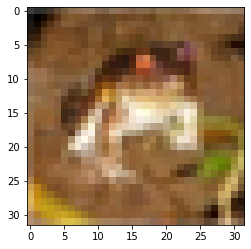

In [4]:
plt.imshow(X_train[0])

#### Function to resize the input image
    - Intitial size : (32x32)
    - Final size : (139x139)
    - Perform inbuilt preprocessing

In [0]:
def resize_data(data):
    data_upscaled = []
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(139,139))
        data_upscaled.append(large_img)
    return data_upscaled
X_train = np.array(resize_data(X_train))
X_test = np.array(resize_data(X_test))
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


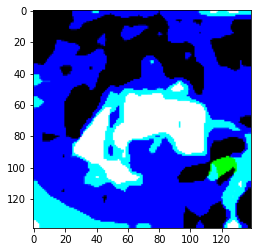

In [6]:
import matplotlib.pyplot as plt
#print(X_train.mean())
plt.imshow(X_train[0])

In [7]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(50000, 139, 139, 3) (10000, 139, 139, 3) (50000, 10) (10000, 10)


#### Model Building

In [8]:
base = VGG16(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

58892288/58889256 [==============================] - 1s 0us/step


#### Freezing the layers in base model

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              2101248   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 16,856,906
Trainable params: 2,142,218
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 77s 2ms/step - loss: 1.0073 - accuracy: 0.7811 - val_loss: 0.4180 - val_accuracy: 0.8570
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/step - loss: 0.3828 - accuracy: 0.8711 - val_loss: 0.3932 - val_accuracy: 0.8632
Epoch 3/10
50000/50000 [==============================] - 69s 1ms/step - loss: 0.3152 - accuracy: 0.8918 - val_loss: 0.3717 - val_accuracy: 0.8710
Epoch 4/10
50000/50000 [==============================] - 69s 1ms/step - loss: 0.2626 - accuracy: 0.9069 - val_loss: 0.3626 - val_accuracy: 0.8755
Epoch 5/10
50000/50000 [==============================] - 69s 1ms/step - loss: 0.2206 - accuracy: 0.9230 - val_loss: 0.3587 - val_accuracy: 0.8786
Epoch 6/10
50000/50000 [==============================] - 69s 1ms/step - loss: 0.1852 - accuracy: 0.9357 - val_loss: 0.3598 - val_accuracy: 0.8797
Epoch 7/10
50000/50000 [==============================] - 69s 1ms/st

#### Performance Evaluation

In [0]:
from sklearn.metrics import precision_score,recall_score,log_loss

In [14]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [15]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.9218106995884774
Precision for class 1 = 0.913926499032882
Precision for class 2 = 0.8840425531914894
Precision for class 3 = 0.7971602434077079
Precision for class 4 = 0.8186046511627907
Precision for class 5 = 0.888509670079636
Precision for class 6 = 0.8982558139534884
Precision for class 7 = 0.921793534932221
Precision for class 8 = 0.935129740518962
Precision for class 9 = 0.943010752688172
Mean Precision =  0.8922244158555828


In [16]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.896
Recall for class 1 = 0.945
Recall for class 2 = 0.831
Recall for class 3 = 0.786
Recall for class 4 = 0.88
Recall for class 5 = 0.781
Recall for class 6 = 0.927
Recall for class 7 = 0.884
Recall for class 8 = 0.937
Recall for class 9 = 0.877
Mean Recall =  0.8744


In [17]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  3.722359061334183
